In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Displacement
## dxy, BS, PV related variables

## dxy

4mu dxy structure: [[-0.000496, 5.27e-05, 0.000965, 0.0075, ... -0.00205, 0.00349, -0.000561, 0.000467]]
2mu2e dxy structure: [[0.00468, -0.0153], [-0.000268, 0.0246, ... 7.3e-05], [-0.000267, -0.000854]]
4mu dxy structure: [[-0.000659, -0.0109, -0.00488, 0.0128], ... -0.0604, 0.0905, -0.00536, 0.594]]
2mu2e dxy structure: [[0.03, -0.0351], [0.0282, -1.18], ... 0.000741], [-0.00576, 0.144, -0.00235]]
4mu dxy structure: [[-0.0321, 0.0205, 0.0764, -0.041, 0.0158], ... 0.385, -0.265, 0.29, 0.0958, -0.155]]
2mu2e dxy structure: [[-0.052, 0.0621], [0.103, -0.131], [0.206, ... [0.0984, -0.521], [-0.228, 0.556]]
4mu dxy structure: [[-0.0369, 0.13, 0.00982, -0.904], ... [-0.108, -0.13, 0.0151, -0.02, 0.00359]]
2mu2e dxy structure: [[-0.18, 0.395], [0.0264, -0.601], ... [-0.00979, 0.000579], [0.0229, -0.0677]]
4mu dxy structure: [[-0.0719, -0.0023, 0.335], [], [-0.305, ... [0.0429, 0.133], [-0.0228, -0.00929]]
2mu2e dxy structure: [[-0.00366, 0.957, 0.00099], [-0.00397], ... [-0.0401, -0.000465

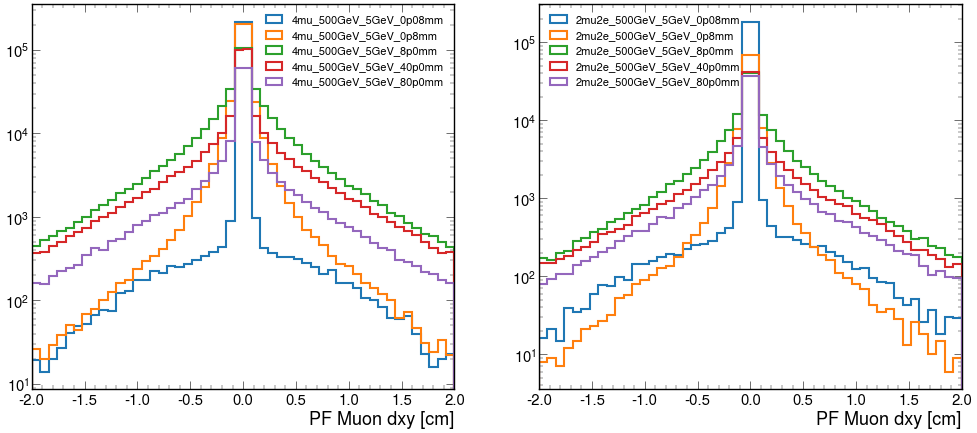

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxy [cm]')
ax[1].set_xlabel('PF Muon dxy [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy.png", bbox_inches="tight")

## dxyErr

4mu dxyErr structure: [[0.000778, 0.000992, 0.000885, 0.00104], ... [0.00169, 0.00131, 0.00108, 0.00131]]
2mu2e dxyErr structure: [[0.0013, 0.00156], [0.000946, 0.0022], ... 0.00101, 0.00175], [0.00119, 0.0011]]
4mu dxyErr structure: [[0.00124, 0.00229, 0.0104, 0.00101], ... 0.00247, 0.0025, 0.00302, 0.00201, 0.0239]]
2mu2e dxyErr structure: [[0.00177, 0.00177], [0.00143, 0.00757], ... 0.00136], [0.00128, 0.00278, 0.00296]]
4mu dxyErr structure: [[0.00162, 0.00253, 0.00145, 0.0996, 0.00336, ... 0.00696, 0.00867, 0.0061, 0.00671]]
2mu2e dxyErr structure: [[0.00157, 0.00142], [0.00739, 0.0151], ... [0.00513, 0.00537], [0.00879, 0.0106]]
4mu dxyErr structure: [[0.0977, 0.0025, 0.0996, 0.0148], ... [0.0986, 0.0781, 0.0996, 0.0986, 0.0996]]
2mu2e dxyErr structure: [[0.00665, 0.00388], [0.00223, 0.00317], ... [0.0908, 0.00269], [0.00586, 0.00586]]
4mu dxyErr structure: [[0.0996, 0.0996, 0.0069], [], [0.083, ... [0.0977, 0.0025], [0.0996, 0.00139]]
2mu2e dxyErr structure: [[0.0986, 0.0337, 0.

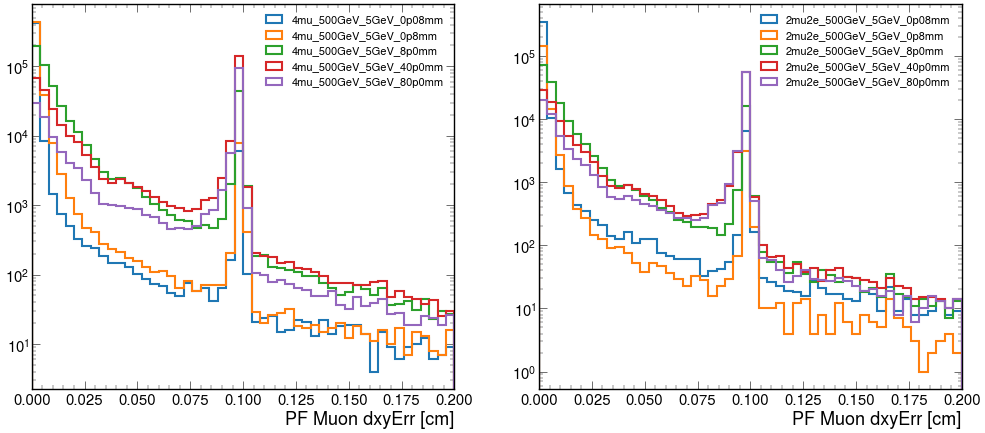

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.2)
ax[1].set_xlim(0,0.2)
ax[0].set_xlabel('PF Muon dxyErr [cm]')
ax[1].set_xlabel('PF Muon dxyErr [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyErr.png", bbox_inches="tight")

## dxybs

4mu dxybs structure: [[0.000564, -0.001, 0.00201, 0.00645], ... [0.00104, 0.000375, -0.00361, 0.00363]]
2mu2e dxybs structure: [[0.00551, -0.0146], [-0.000456, 0.0245, ... -0.00101], [4.8e-05, -0.000668]]
4mu dxybs structure: [[-0.00362, -0.00791, -0.00195, 0.00974], ... -0.0566, 0.0869, -0.00721, 0.592]]
2mu2e dxybs structure: [[0.0284, -0.0367], [0.0287, -1.18], ... 0.00163], [-0.00827, 0.141, -0.00483]]
4mu dxybs structure: [[-0.032, 0.0203, 0.0764, -0.0417, 0.0172, ... 0.382, -0.268, 0.287, 0.0983, -0.153]]
2mu2e dxybs structure: [[-0.0524, 0.0617], [0.103, -0.132], ... [0.0942, -0.526], [-0.231, 0.553]]
4mu dxybs structure: [[-0.0378, 0.131, 0.00891, -0.903], ... [-0.11, -0.132, 0.0166, -0.0185, 0.00514]]
2mu2e dxybs structure: [[-0.182, 0.393], [0.0268, -0.601], ... [-0.00804, 0.00296], [0.0167, -0.0739]]
4mu dxybs structure: [[-0.0724, -0.00196, 0.336], [], [-0.304, ... [0.0439, 0.132], [-0.0241, -0.00835]]
2mu2e dxybs structure: [[-0.00278, 0.958, 6.14e-06], [-0.00431], ... [-0

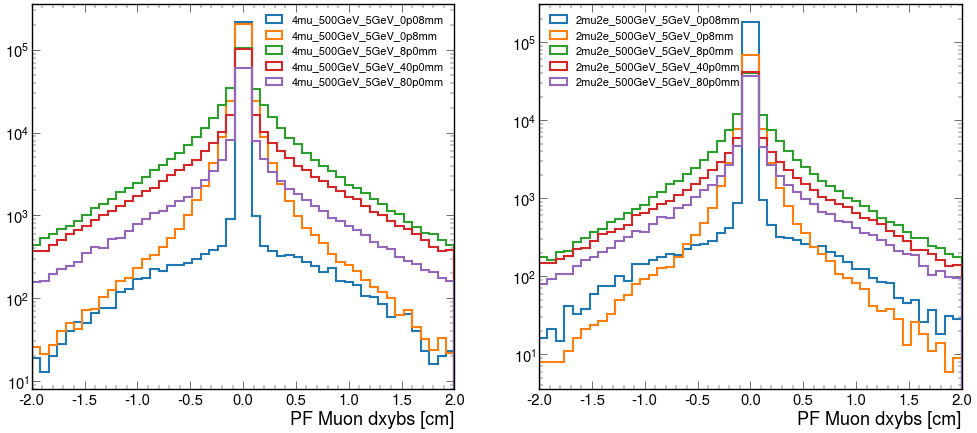

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs", events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxybs [cm]')
ax[1].set_xlabel('PF Muon dxybs [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxybs.png", bbox_inches="tight")

## dxy - dxybs

4mu dxy - dxybs structure: [[-0.00106, 0.00106, -0.00105, 0.00105], ... [-0.00309, 0.00311, 0.00305, -0.00316]]
2mu2e dxy - dxybs structure: [[-0.000832, -0.00071], [0.000188, 0.000168, ... 0.00108], [-0.000315, -0.000186]]
4mu dxy - dxybs structure: [[0.00296, -0.00294, -0.00293, 0.00304], ... -0.00378, 0.00354, 0.00185, 0.00195]]
2mu2e dxy - dxybs structure: [[0.0016, 0.00165], [-0.000488, -0.000977, ... [0.00251, 0.00269, 0.00248]]
4mu dxy - dxybs structure: [[-9.16e-05, 0.000168, 0, 0.000671, ... 0.00244, 0.00269, -0.0025, -0.00256]]
2mu2e dxy - dxybs structure: [[0.000397, 0.000397], [0.000854, 0.000854, ... 0.00439], [0.00269, 0.00244]]
4mu dxy - dxybs structure: [[0.000885, -0.000977, 0.000908, -0.000977, ... -0.0015, -0.00154, -0.00155]]
2mu2e dxy - dxybs structure: [[0.00208, 0.00195], [-0.000366, 0], ... [-0.00175, -0.00238], [0.00624, 0.00616]]
4mu dxy - dxybs structure: [[0.000488, -0.000341, -0.00122], [], ... -0.000977, 0.000977], [0.00125, -0.000946]]
2mu2e dxy - dxybs s

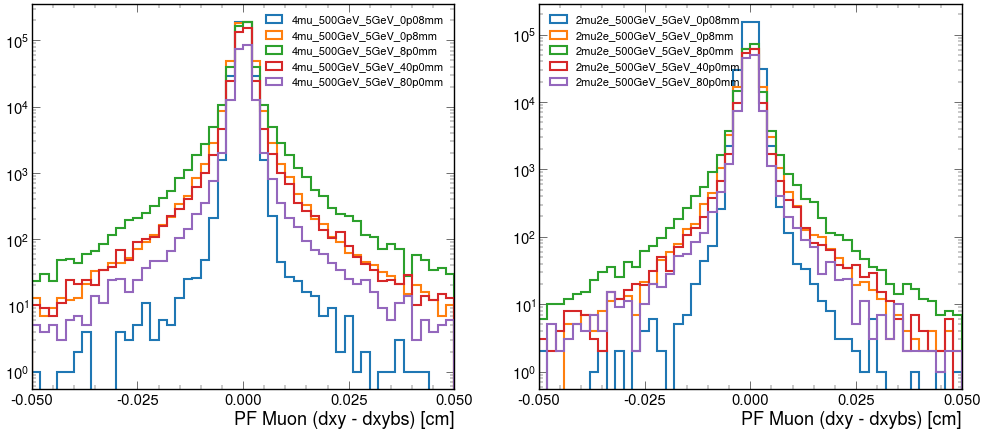

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxybs", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxybs.png", bbox_inches="tight")

## dxyPVTraj

4mu dxyPVTraj structure: [[0.000668, 0.000184, -0.000965, -0.0075, ... -0.00349, 0.000759, -0.000291]]
2mu2e dxyPVTraj structure: [[-0.00461, 0.0153], [0.000268, -0.0246, ... -0.00112], [3.72e-05, 0.000854]]
4mu dxyPVTraj structure: [[0.000315, 0.0104, 0.00139, -0.0128], ... 0.0604, -0.0905, 0.00536, -0.587]]
2mu2e dxyPVTraj structure: [[-0.03, 0.0348], [-0.0269, 1.18], ... -0.00163], [0.0059, -0.144, 0.00235]]
4mu dxyPVTraj structure: [[0.0321, -0.0205, -0.0763, 0.0411, -0.0152, ... 0.265, -0.29, -0.0961, 0.155]]
2mu2e dxyPVTraj structure: [[0.0522, -0.0621], [-0.104, 0.121], ... [-0.0983, 0.522], [0.228, -0.553]]
4mu dxyPVTraj structure: [[0.0369, -0.13, -0.00982, 0.92], ... [0.108, 0.13, -0.0151, 0.02, -0.00359]]
2mu2e dxyPVTraj structure: [[0.179, -0.395], [-0.0264, 0.601], ... [0.00979, -0.000579], [-0.0228, 0.0677]]
4mu dxyPVTraj structure: [[0.0719, 0.0023, -0.335], [], [0.305, ... [-0.0429, -0.131], [0.0228, 0.00929]]
2mu2e dxyPVTraj structure: [[0.00366, -0.961, -0.00099], [0.

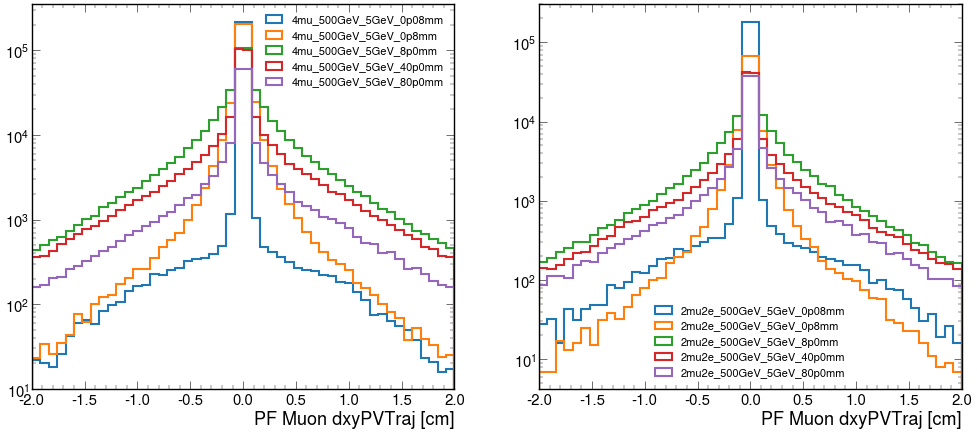

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[1].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyPVTraj.png", bbox_inches="tight")

## dxy - dxyPVTraj

4mu dxy - dxyPVTraj structure: [[-0.00116, -0.000131, 0.00193, 0.015], ... [-0.00386, 0.00698, -0.00132, 0.000758]]
2mu2e dxy - dxyPVTraj structure: [[0.00929, -0.0306], [-0.000536, 0.0492, ... 0.00119], [-0.000304, -0.00171]]
4mu dxy - dxyPVTraj structure: [[-0.000974, -0.0212, -0.00627, 0.0255], ... 0.0439, -0.121, 0.181, -0.0107, 1.18]]
2mu2e dxy - dxyPVTraj structure: [[0.0599, -0.0698], [0.0551, -2.36], ... 0.00237], [-0.0117, 0.288, -0.0047]]
4mu dxy - dxyPVTraj structure: [[-0.0642, 0.041, 0.153, -0.0821, 0.0309], ... [0.77, -0.53, 0.579, 0.192, -0.31]]
2mu2e dxy - dxyPVTraj structure: [[-0.104, 0.124], [0.207, -0.252], [0.409, ... [0.197, -1.04], [-0.457, 1.11]]
4mu dxy - dxyPVTraj structure: [[-0.0738, 0.259, 0.0196, -1.82], ... [-0.215, -0.261, 0.0303, -0.04, 0.00718]]
2mu2e dxy - dxyPVTraj structure: [[-0.359, 0.79], [0.0528, -1.2], [2, ... [-0.0196, 0.00116], [0.0458, -0.135]]
4mu dxy - dxyPVTraj structure: [[-0.144, -0.00459, 0.67], [], [-0.61, ... [0.0858, 0.264], [-0.045

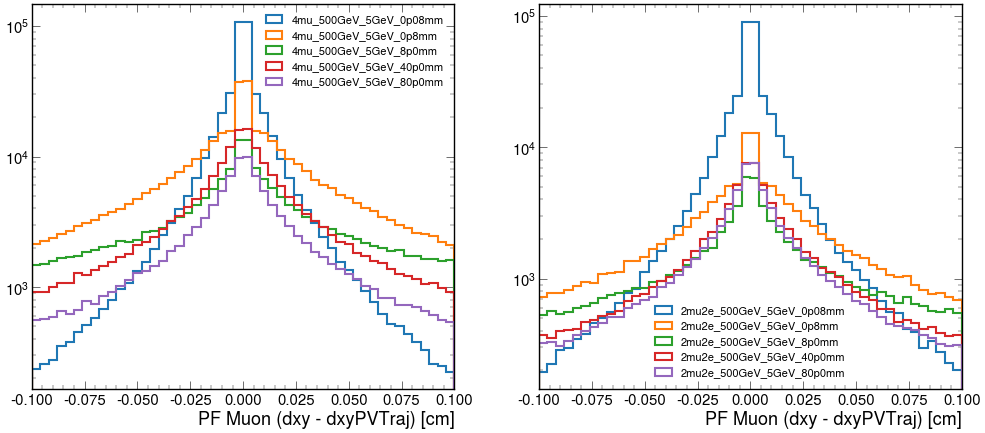

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyPVTraj.png", bbox_inches="tight")

## dxyPVSigned

4mu dxyPVSigned structure: [[0.000668, 0.000184, 0.000965, -0.0075, ... -0.00349, 0.000759, -0.000291]]
2mu2e dxyPVSigned structure: [[-0.00461, 0.0153], [0.000268, -0.0246, ... 0.00112], [-3.72e-05, -0.000854]]
4mu dxyPVSigned structure: [[-0.000315, -0.0104, -0.00139, -0.0128], ... -0.0604, 0.0905, -0.00536, -0.587]]
2mu2e dxyPVSigned structure: [[-0.03, -0.0348], [-0.0269, 1.18], ... 0.000988, 0.00163], [0.0059, 0.144, 0.00235]]
4mu dxyPVSigned structure: [[0.0321, 0.0205, 0.0763, 0.0411, -0.0152], ... 0.385, -0.265, -0.29, 0.0961, 0.155]]
2mu2e dxyPVSigned structure: [[0.0522, -0.0621], [-0.104, -0.121], ... [-0.0983, -0.522], [-0.228, -0.553]]
4mu dxyPVSigned structure: [[0.0369, 0.13, 0.00982, 0.92], [0.0031, ... [-0.108, 0.13, 0.0151, 0.02, -0.00359]]
2mu2e dxyPVSigned structure: [[-0.179, 0.395], [-0.0264, 0.601], ... [-0.00979, 0.000579], [-0.0228, -0.0677]]
4mu dxyPVSigned structure: [[0.0719, 0.0023, 0.335], [], [0.305, ... [-0.0429, -0.131], [-0.0228, 0.00929]]
2mu2e dxyPVS

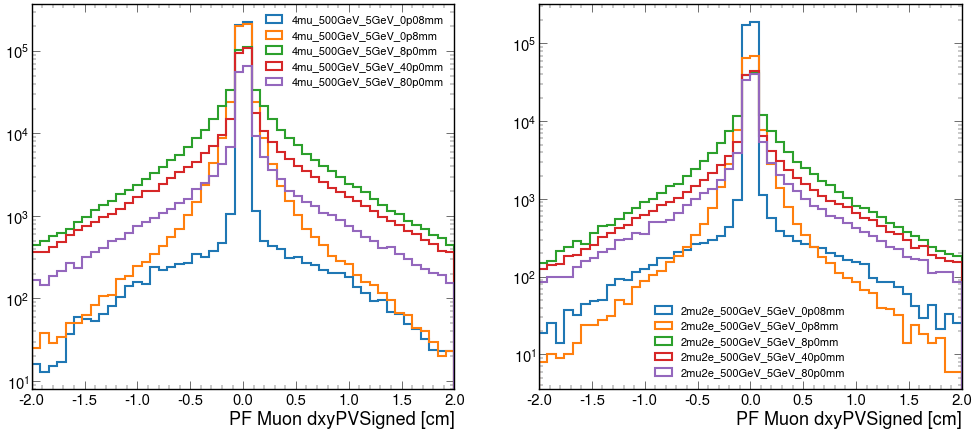

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[1].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyPVSigned.png", bbox_inches="tight")

## dxy - dxyPVSigned

4mu dxy - dxyPVSigned structure: [[-0.00116, -0.000131, -1.08e-07, 0.015], ... -0.00023, 0.00698, -0.00132, 0.000758]]
2mu2e dxy - dxyPVSigned structure: [[0.00929, -0.0306], [-0.000536, 0.0492, ... -0.00105], [-0.00023, 2.13e-07]]
4mu dxy - dxyPVSigned structure: [[-0.000344, -0.000504, -0.00349, 0.0255, ... -8.88e-06, -1.19e-05, -6.05e-07, 1.18]]
2mu2e dxy - dxyPVSigned structure: [[0.0599, -0.000294], [0.0551, -2.36], ... -0.000891], [-0.0117, -4.13e-05, -0.0047]]
4mu dxy - dxyPVSigned structure: [[-0.0642, -3.44e-06, 6.15e-06, -0.0821, ... -5.12e-05, 0.579, -0.000375, -0.31]]
2mu2e dxy - dxyPVSigned structure: [[-0.104, 0.124], [0.207, -0.00994], ... [0.197, 0.000235], [-4.62e-07, 1.11]]
4mu dxy - dxyPVSigned structure: [[-0.0738, -5.78e-05, 3.12e-07, -1.82], ... -0.261, 7.54e-08, -0.04, 0.00718]]
2mu2e dxy - dxyPVSigned structure: [[-0.00126, -0.000258], [0.0528, -1.2], ... -1.9e-06, 7.05e-08], [0.0458, -1.49e-05]]
4mu dxy - dxyPVSigned structure: [[-0.144, -0.00459, -0.000406], [

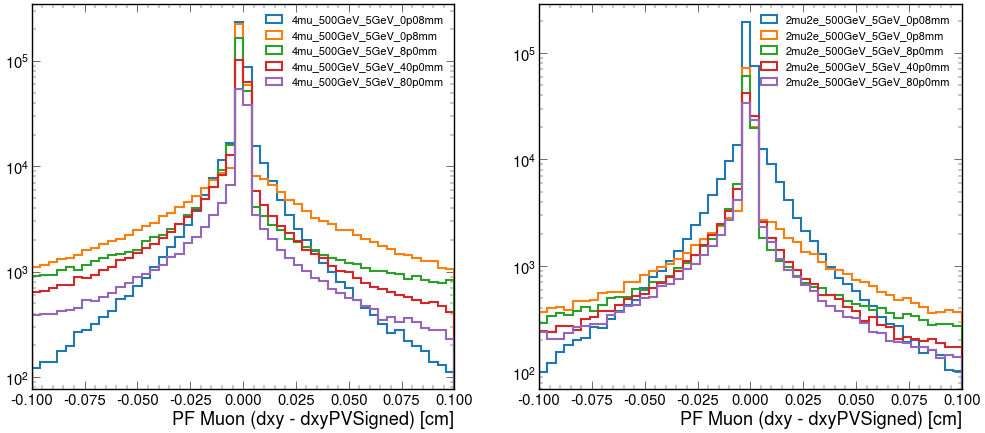

In [29]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyPVSigned.png", bbox_inches="tight")

## dxyBS

4mu dxyBS structure: [[0.000407, -0.00125, 0.00203, 0.00644], ... [0.00126, 0.000391, -0.00379, 0.00344]]
2mu2e dxyBS structure: [[0.00546, -0.0146], [-0.000459, 0.0244, ... 1.11e-05], [0.000246, -0.0007]]
4mu dxyBS structure: [[-0.00329, -0.00739, 0.00159, 0.00972], ... -0.0566, 0.087, -0.00717, 0.585]]
2mu2e dxyBS structure: [[0.0284, -0.0364], [0.0274, -1.18], ... 0.00252], [-0.00841, 0.142, -0.00485]]
4mu dxyBS structure: [[-0.0321, 0.0204, 0.0763, -0.0417, 0.0166, ... -0.268, 0.287, 0.0987, -0.153]]
2mu2e dxyBS structure: [[-0.0526, 0.0617], [0.103, -0.122], ... [0.0942, -0.526], [-0.231, 0.551]]
4mu dxyBS structure: [[-0.0378, 0.131, 0.00891, -0.919], ... [-0.11, -0.132, 0.0166, -0.0185, 0.0051]]
2mu2e dxyBS structure: [[-0.181, 0.393], [0.0267, -0.601], ... [-0.00803, 0.00296], [0.0166, -0.0739]]
4mu dxyBS structure: [[-0.0724, -0.00194, 0.336], [], [-0.304, ... [0.0438, 0.13], [-0.0241, -0.00834]]
2mu2e dxyBS structure: [[-0.00281, 0.962, 5.53e-06], [-0.00432], ... [-0.0398, -0

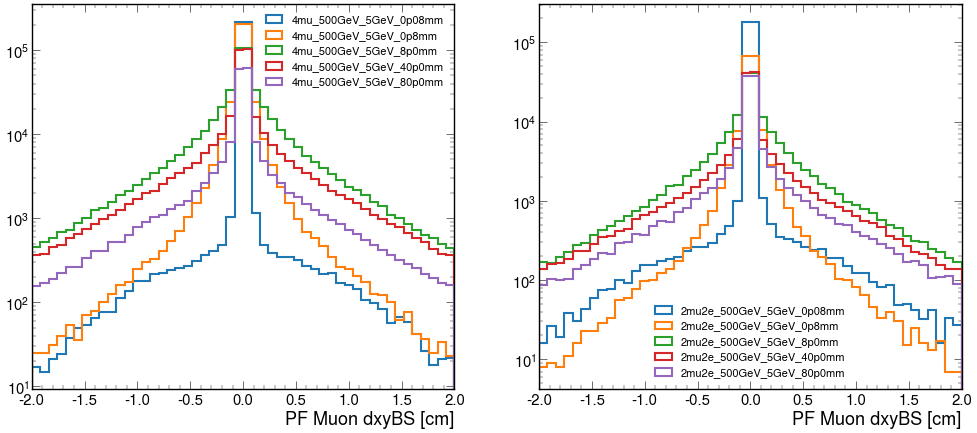

In [30]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxyBS [cm]')
ax[1].set_xlabel('PF Muon dxyBS [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBS.png", bbox_inches="tight")

## dxy - dxyBS

4mu dxy - dxyBS structure: [[-0.000904, 0.00131, -0.00106, 0.00106], ... [-0.0033, 0.0031, 0.00323, -0.00297]]
2mu2e dxy - dxyBS structure: [[-0.00078, -0.000703], [0.000191, 0.000223, ... 6.2e-05], [-0.000514, -0.000154]]
4mu dxy - dxyBS structure: [[0.00263, -0.00347, -0.00647, 0.00306], ... -0.00374, 0.00345, 0.00182, 0.00949]]
2mu2e dxy - dxyBS structure: [[0.00157, 0.00135], [0.000869, -0.000933, ... -0.00178], [0.00265, 0.00257, 0.0025]]
4mu dxy - dxyBS structure: [[-6.16e-06, 0.000129, 3.56e-05, 0.000677, ... 0.00254, 0.00262, -0.00293, -0.00249]]
2mu2e dxy - dxyBS structure: [[0.000556, 0.000408], [0.000521, -0.00913, ... 0.00441], [0.00272, 0.00496]]
4mu dxy - dxyBS structure: [[0.000889, -0.00104, 0.000907, 0.0155], ... 0.00195, -0.0015, -0.0015, -0.00151]]
2mu2e dxy - dxyBS structure: [[0.000828, 0.00182], [-0.000301, 4.24e-05, ... -0.00238], [0.00632, 0.00612]]
4mu dxy - dxyBS structure: [[0.000465, -0.000352, -0.00145], [], ... -0.000966, 0.00229], [0.00127, -0.000957]]
2m

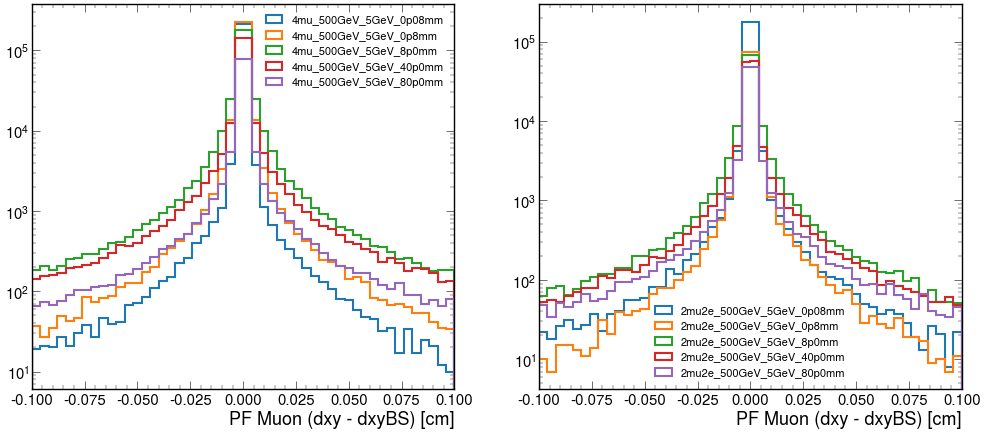

In [31]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBS", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyBS.png", bbox_inches="tight")

## dxybs - dxyBS

4mu dxybs - dxyBS structure: [[0.000157, 0.000251, -1.27e-05, 1.49e-05, ... -1.6e-05, 0.000182, 0.000193]]
2mu2e dxybs - dxyBS structure: [[5.2e-05, 7e-06], [2.41e-06, 5.53e-05, ... -0.00102], [-0.000198, 3.23e-05]]
4mu dxybs - dxyBS structure: [[-0.000325, -0.000525, -0.00354, 1.91e-05, ... -8.54e-05, -3.74e-05, 0.00754]]
2mu2e dxybs - dxyBS structure: [[-2.8e-05, -0.000302], [0.00136, 4.4e-05, ... [0.000142, -0.000115, 2.04e-05]]
4mu dxybs - dxyBS structure: [[8.54e-05, -3.88e-05, 3.56e-05, 6.03e-06, ... -6.32e-05, -0.000431, 7.58e-05]]
2mu2e dxybs - dxyBS structure: [[0.000159, 1.16e-05], [-0.000333, -0.00999, ... 1.32e-05], [3.45e-05, 0.00252]]
4mu dxybs - dxyBS structure: [[4.4e-06, -6.19e-05, -6.06e-07, 0.0165, ... -1.8e-06, 1.75e-06, 3.67e-05, 3.73e-05]]
2mu2e dxybs - dxyBS structure: [[-0.00125, -0.000129], [6.48e-05, 4.24e-05, ... -9.4e-07], [8.09e-05, -4.38e-05]]
4mu dxybs - dxyBS structure: [[-2.33e-05, -1.1e-05, -0.000227], [], ... 1.02e-05, 0.00131], [1.75e-05, -1.08e-05]]

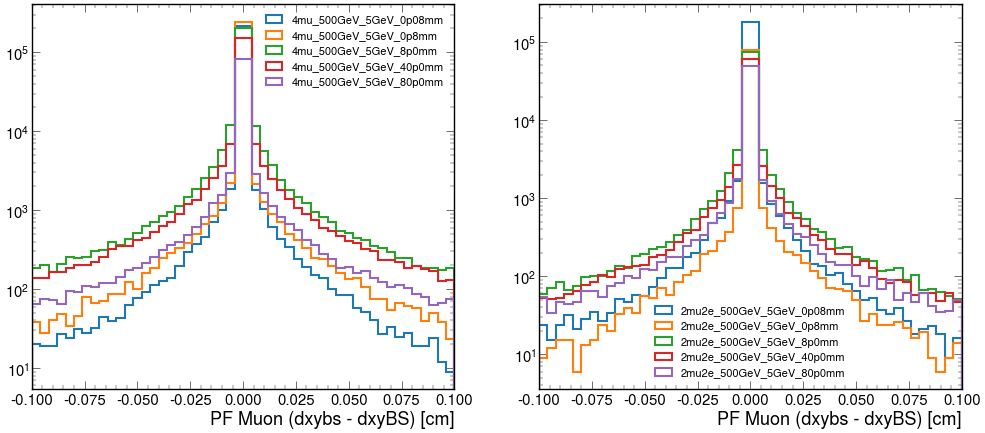

In [32]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBS", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxybs-dxyBS.png", bbox_inches="tight")

## dxyBSTraj

4mu dxyBSTraj structure: [[0.0394, 0.0406, 0.0417, 0.0333], [0.000596, ... [0.0291, 0.027, 0.0324, 0.0298]]
2mu2e dxyBSTraj structure: [[0.026, 0.0488], [0.0428, 0.0185], ... 0.0379, 0.0138, 0.0125], [0.0185, 0.0175]]
4mu dxyBSTraj structure: [[0.0356, 0.0247, 0.0339, 0.024], ... 0.00413, 0.0852, 0.127, 0.0194, 0.574]]
2mu2e dxyBSTraj structure: [[0.0307, 0.0364], [0.0666, 1.14], ... [0.0431, 0.0457], [0.0511, 0.1, 0.0327]]
4mu dxyBSTraj structure: [[0.00647, 0.0187, 0.114, 0.0844, 0.00531], ... [0.424, 0.226, 0.329, 0.0762, 0.174]]
2mu2e dxyBSTraj structure: [[0.0443, 0.0685], [0.091, 0.134], [0.167, ... [0.137, 0.483], [0.245, 0.538]]
4mu dxyBSTraj structure: [[0.00428, 0.0918, 0.0508, 0.96], ... [0.152, 0.175, 0.0465, 0.0113, 0.0353]]
2mu2e dxyBSTraj structure: [[0.156, 0.419], [0.0378, 0.584], [0.945, ... [0.0109, 0.0418], [0.0222, 0.112]]
4mu dxyBSTraj structure: [[0.0374, 0.038, 0.312], [], [0.34, 0.0364, ... [0.0709, 0.103], [0.0673, 0.0286]]
2mu2e dxyBSTraj structure: [[0.0157,

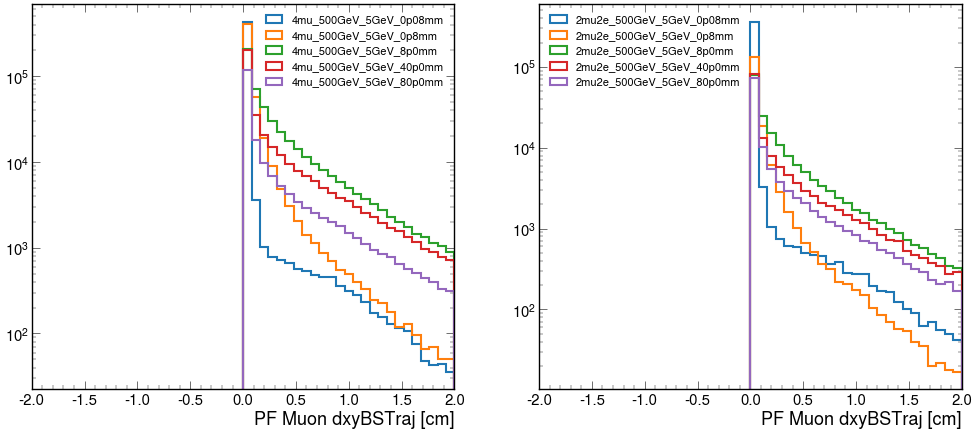

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[1].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBSTraj.png", bbox_inches="tight")

## dxyBSSigned

4mu dxyBSSigned structure: [[-0.000407, 0.00125, 0.00203, -0.00644], ... [0.00126, 0.000391, 0.00379, -0.00344]]
2mu2e dxyBSSigned structure: [[-0.00546, 0.0146], [0.000458, -0.0244, ... 1.11e-05], [0.000246, -0.0007]]
4mu dxyBSSigned structure: [[-0.00329, -0.00739, 0.00159, -0.00972], ... -0.0566, 0.087, 0.00717, -0.585]]
2mu2e dxyBSSigned structure: [[0.0284, -0.0364], [-0.0274, 1.18], ... 0.00252], [0.00841, 0.142, 0.00485]]
4mu dxyBSSigned structure: [[0.0321, 0.0204, 0.0763, 0.0417, -0.0166, ... -0.382, -0.268, 0.287, 0.0987, 0.153]]
2mu2e dxyBSSigned structure: [[0.0526, -0.0617], [-0.103, -0.122], ... [-0.0942, 0.526], [0.231, -0.551]]
4mu dxyBSSigned structure: [[-0.0378, 0.131, 0.00891, 0.919], ... [0.11, 0.132, -0.0166, -0.0185, 0.0051]]
2mu2e dxyBSSigned structure: [[-0.181, 0.393], [-0.0267, 0.601], ... [-0.00803, -0.00296], [-0.0166, -0.0739]]
4mu dxyBSSigned structure: [[0.0724, 0.00194, 0.336], [], [0.304, ... [-0.0438, -0.13], [-0.0241, 0.00834]]
2mu2e dxyBSSigned stru

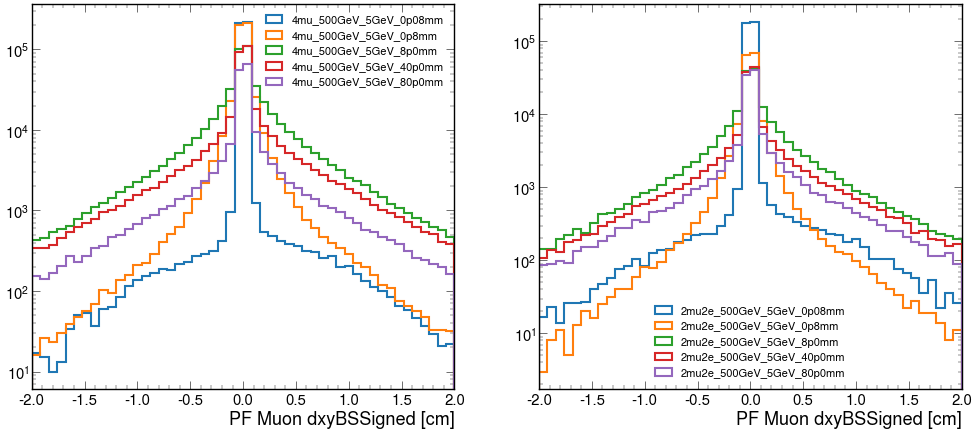

In [34]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2,2)
ax[1].set_xlim(-2,2)
ax[0].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[1].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBSSigned.png", bbox_inches="tight")

## dxy - dxyBSSigned

4mu dxy - dxyBSSigned structure: [[-8.92e-05, -0.0012, -0.00106, 0.0139], ... [-0.0033, 0.0031, -0.00435, 0.0039]]
2mu2e dxy - dxyBSSigned structure: [[0.0101, -0.0299], [-0.000726, 0.049, ... 6.2e-05], [-0.000514, -0.000154]]
4mu dxy - dxyBSSigned structure: [[0.00263, -0.00347, -0.00647, 0.0225], ... -0.00374, 0.00345, -0.0125, 1.18]]
2mu2e dxy - dxyBSSigned structure: [[0.00157, 0.00135], [0.0556, -2.35], ... -0.00178], [-0.0142, 0.00257, -0.0072]]
4mu dxy - dxyBSSigned structure: [[-0.0641, 0.000129, 3.56e-05, -0.0828, ... 0.00254, 0.00262, -0.00293, -0.308]]
2mu2e dxy - dxyBSSigned structure: [[-0.105, 0.124], [0.206, -0.00913], [0.41, ... [0.193, -1.05], [-0.459, 1.11]]
4mu dxy - dxyBSSigned structure: [[0.000889, -0.00104, 0.000907, -1.82], ... -0.263, 0.0318, -0.0015, -0.00151]]
2mu2e dxy - dxyBSSigned structure: [[0.000828, 0.00182], [0.0532, -1.2], ... [-0.00176, 0.00354], [0.0395, 0.00612]]
4mu dxy - dxyBSSigned structure: [[-0.144, -0.00424, -0.00145], [], [-0.609, ... [0.0

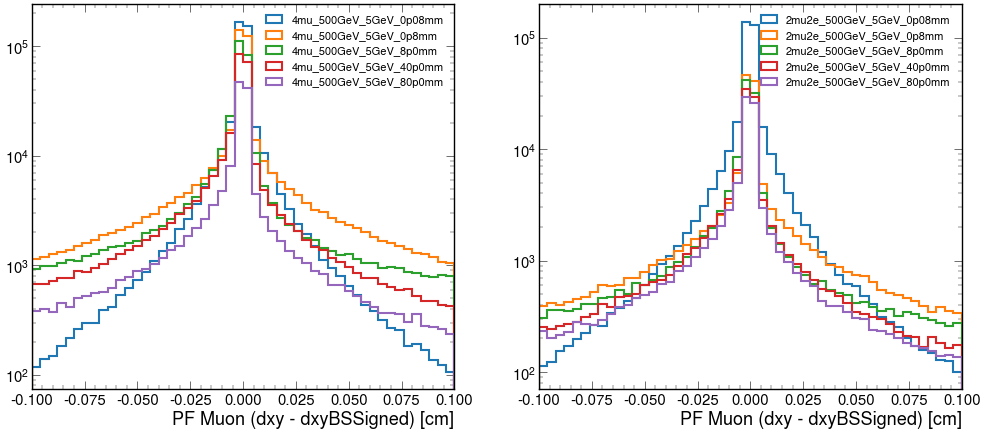

In [35]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyBSSigned.png", bbox_inches="tight")

## dxybs - dxyBSSigned

4mu dxybs - dxyBSSigned structure: [[0.000971, -0.00226, -1.27e-05, 0.0129], ... -0.000214, -1.6e-05, -0.0074, 0.00707]]
2mu2e dxybs - dxyBSSigned structure: [[0.011, -0.0292], [-0.000915, 0.0489, ... -0.00102], [-0.000198, 3.23e-05]]
4mu dxybs - dxyBSSigned structure: [[-0.000325, -0.000525, -0.00354, 0.0195], ... 3.96e-05, -8.54e-05, -0.0144, 1.18]]
2mu2e dxybs - dxyBSSigned structure: [[-2.8e-05, -0.000302], [0.0561, -2.35, ... [-0.0167, -0.000115, -0.00968]]
4mu dxybs - dxyBSSigned structure: [[-0.0641, -3.88e-05, 3.56e-05, -0.0834, ... 0.000103, -6.31e-05, -0.000431, -0.305]]
2mu2e dxybs - dxyBSSigned structure: [[-0.105, 0.123], [0.205, -0.00999], [0.412, ... [0.188, -1.05], [-0.462, 1.1]]
4mu dxybs - dxyBSSigned structure: [[4.4e-06, -6.19e-05, -6.03e-07, -1.82], ... -0.265, 0.0333, 3.67e-05, 3.73e-05]]
2mu2e dxybs - dxyBSSigned structure: [[-0.00125, -0.000129], [0.0535, -1.2], ... -1.37e-05, 0.00591], [0.0333, -4.38e-05]]
4mu dxybs - dxyBSSigned structure: [[-0.145, -0.0039, -

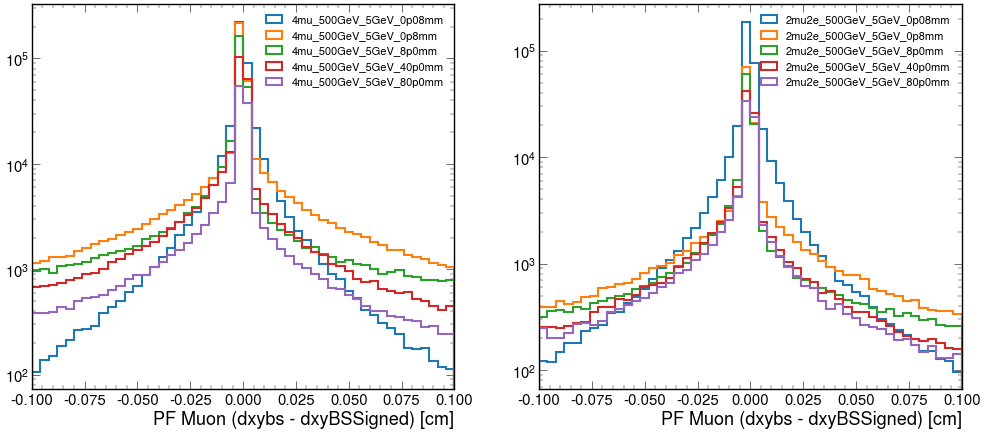

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBSSigned", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxybs-dxyBSSigned.png", bbox_inches="tight")

## dxyBS - dxyBSSigned

4mu dxyBS - dxyBSSigned structure: [[0.000814, -0.00251, 6.98e-10, 0.0129], ... [2.33e-10, -3.2e-10, -0.00758, 0.00688]]
2mu2e dxyBS - dxyBSSigned structure: [[0.0109, -0.0292], [-0.000917, 0.0488, ... 1.61e-09], [-2.33e-09, -9.31e-10]]
4mu dxyBS - dxyBSSigned structure: [[-2.56e-09, 0, 0, 0.0194], [-1.05e-09, ... [0, -1.86e-09, 0, 0, -0.0143, 1.17]]
2mu2e dxyBS - dxyBSSigned structure: [[1.86e-09, 0], [0.0548, -2.35], ... [-0.000208, 4.66e-10], [-0.0168, 0, -0.0097]]
4mu dxyBS - dxyBSSigned structure: [[-0.0641, 0, 7.45e-09, -0.0834, 0.0331], ... 0.765, 0, 2.98e-08, -7.45e-09, -0.305]]
2mu2e dxyBS - dxyBSSigned structure: [[-0.105, 0.123], [0.206, 7.45e-09], [0.408, ... [0.188, -1.05], [-0.462, 1.1]]
4mu dxyBS - dxyBSSigned structure: [[3.73e-09, 0, 2.79e-09, -1.84], ... [-0.219, -0.265, 0.0333, -1.86e-09, 1.4e-09]]
2mu2e dxyBS - dxyBSSigned structure: [[0, 0], [0.0535, -1.2], [1.98], ... [1.05e-09], [0, 0.00591], [0.0332, 7.45e-09]]
4mu dxyBS - dxyBSSigned structure: [[-0.145, -0.003

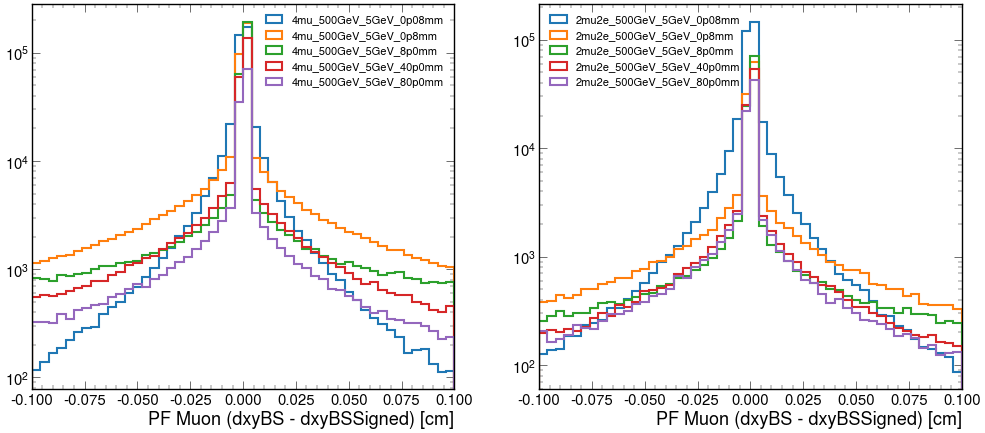

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBS-dxyBSSigned.png", bbox_inches="tight")

## dz

4mu dz structure: [[0.00124, -0.00228, -0.00288, 0.0148], ... [0.00225, 0.00517, 0.00163, -0.00259]]
2mu2e dz structure: [[0.00723, -0.00673], [-0.000697, -0.0307, ... -0.0103], [-0.00691, 0.00283]]
4mu dz structure: [[-0.00115, 0.0801, 3.9, 0.0142], ... 0.00568, -0.0283, -0.203, 0.0134, 1.85]]
2mu2e dz structure: [[-0.00287, 0.00767], [-0.0046, 0.311], ... 0.00249], [-0.022, 0.36, -0.000502]]
4mu dz structure: [[-0.0778, 12.3, 0.204, 3.61, -0.542], ... [9.41, 0.601, -0.639, -0.996, 1.43]]
2mu2e dz structure: [[5.51, 5.61], [0.561, -0.562], [6.69, ... [0.00976, 0.603], [0.0914, -0.419]]
4mu dz structure: [[-2.09, -0.14, -5.46, 1.34], [-2.87, 0.672, ... [-2.42, 1.38, -2.3, 4.25, 4.57]]
2mu2e dz structure: [[0.6, -0.0145], [0.0174, -0.255], [1.49, ... [-1.21, 0.00204], [-0.0941, 0.0352]]
4mu dz structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... -0.0033], [2.61, 1.29], [12, 0.00094]]
2mu2e dz structure: [[-0.0928, -2.4, -2.7], [-1.58], [4.27], ... [0.849, -0.542], [-1.21, 10.2], [-1.1

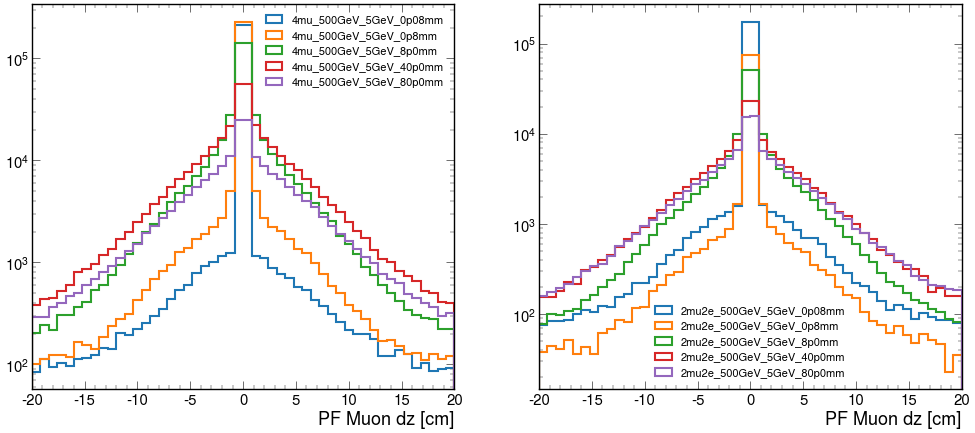

In [38]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dz [cm]')
ax[1].set_xlabel('PF Muon dz [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz.png", bbox_inches="tight")

## dzErr

4mu dzErr structure: [[0.00253, 0.00256, 0.0025, 0.00235], ... [0.00555, 0.00604, 0.00433, 0.00562]]
2mu2e dzErr structure: [[0.00629, 0.00854], [0.00244, 0.00296], ... 0.00525, 0.00537], [0.00385, 0.00366]]
4mu dzErr structure: [[0.00302, 0.00403, 0.469, 0.00327], ... 0.00739, 0.00751, 0.00818, 0.00793, 0.215]]
2mu2e dzErr structure: [[0.00397, 0.00381], [0.00439, 0.0072], ... 0.00464], [0.00421, 0.0069, 0.00903]]
4mu dzErr structure: [[0.00427, 0.0117, 0.0061, 3.59, 0.0116], ... [1.28, 0.041, 0.0493, 0.0322, 0.0342]]
2mu2e dzErr structure: [[0.00323, 0.00385], [0.0771, 0.0781], ... [0.0153, 0.0159], [0.0635, 0.062]]
4mu dzErr structure: [[0.852, 0.0312, 0.984, 0.176], [4.12, 0.41, ... [4.31, 0.473, 1.19, 0.465, 1.77]]
2mu2e dzErr structure: [[0.0508, 0.00903], [0.00519, 0.00623], ... [3.34, 0.00781], [0.00793, 0.00793]]
4mu dzErr structure: [[1.05, 4.56, 0.0131], [], [2.53, 0.5, ... [0.555, 0.0151], [0.656, 0.00415]]
2mu2e dzErr structure: [[0.898, 0.516, 4.56], [2.47], [0.24], ... [

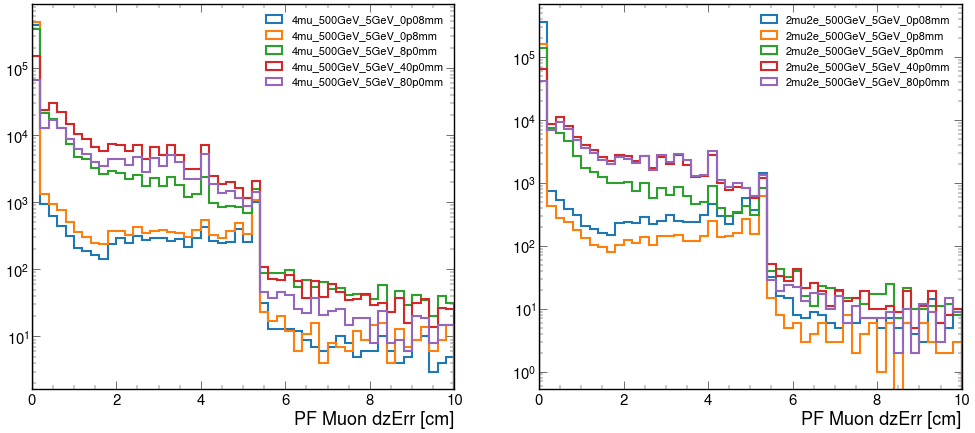

In [40]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Muon dzErr [cm]')
ax[1].set_xlabel('PF Muon dzErr [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzErr.png", bbox_inches="tight")

## dzPV

4mu dzPV structure: [[0.00208, -0.00207, -0.00288, 0.0148], ... [0.00225, 0.00517, 0.000893, -0.00281]]
2mu2e dzPV structure: [[0.00669, -0.0069], [-0.000697, -0.0307, ... -0.0106], [-0.0112, 0.00283]]
4mu dzPV structure: [[-0.000751, 0.0798, 1.88, 0.0142], ... 0.00508, -0.0283, -0.203, 0.0134, 1.91]]
2mu2e dzPV structure: [[-0.00287, 0.00718], [0.0571, 0.311], ... -0.0576], [-0.022, 0.36, -0.000502]]
4mu dzPV structure: [[-0.0779, 12.3, 0.204, 3.61, -0.542], ... [9.42, 0.601, -0.639, -1, 1.43]]
2mu2e dzPV structure: [[5.51, 5.61], [0.534, -0.517], [6.59, ... [0.00963, 0.603], [0.0914, -0.401]]
4mu dzPV structure: [[-2.09, -0.14, -5.46, 1.36], [-2.87, 0.673, ... [-2.42, 1.38, -2.3, 4.25, 4.57]]
2mu2e dzPV structure: [[0.582, -0.0133], [0.0161, -0.255], ... [-1.21, 0.00204], [-0.0918, 0.0353]]
4mu dzPV structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... -0.00436], [2.61, 1.29], [12, 0.000942]]
2mu2e dzPV structure: [[-0.0928, -1.94, -2.7], [-1.58], [4.27], ... 0.849, -0.541], [-1.21,

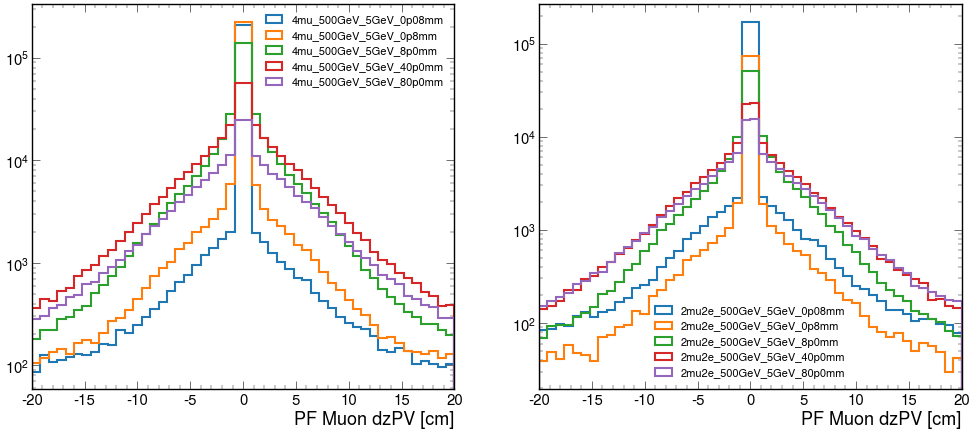

In [42]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dzPV [cm]')
ax[1].set_xlabel('PF Muon dzPV [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzPV.png", bbox_inches="tight")

## dz - dzPV

4mu dz - dzPV structure: [[-0.000837, -0.000215, -1.27e-07, -2.12e-06, ... -3.77e-08, 0.000732, 0.000218]]
2mu2e dz - dzPV structure: [[0.000532, 0.000172], [6.86e-07, -3.98e-06, ... 0.000235], [0.00433, -2.41e-07]]
4mu dz - dzPV structure: [[-0.000399, 0.000318, 2.02, 2.28e-06, ... -5.03e-06, -0.000342, -8.83e-07, -0.0636]]
2mu2e dz - dzPV structure: [[-6.05e-07, 0.000489], [-0.0617, -0.000107, ... [-2.31e-07, -0.000241, 7.24e-08]]
4mu dz - dzPV structure: [[6.21e-05, -0.00148, -2.39e-05, 2.24e-05, ... -0.000142, 0.00506, 0.000112]]
2mu2e dz - dzPV structure: [[-0.00257, -0.00186], [0.0268, -0.0449, ... 0.00013, 0.000117], [1.17e-05, -0.0182]]
4mu dz - dzPV structure: [[-0.000495, 2.45e-05, -0.00194, -0.0211, ... 0.000281, -0.000936, 0.000226]]
2mu2e dz - dzPV structure: [[0.0174, -0.00123], [0.00129, 5.68e-05, ... -2e-07], [-0.00229, -7.18e-05]]
4mu dz - dzPV structure: [[-2.74e-05, 0.000828, 0.000379], [], ... -0.00312], [-0.00281, -2.28e-06]]
2mu2e dz - dzPV structure: [[1.97e-05, 

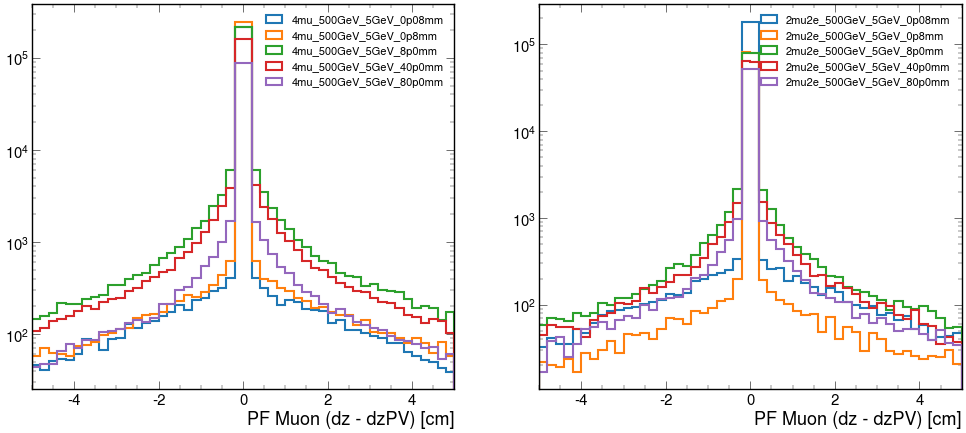

In [43]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz-dzPV.png", bbox_inches="tight")

## dzBS

4mu dzBS structure: [[2.63, 2.63, 2.63, 2.65], [0.656, 0.666, ... -0.773], [2.66, 2.67, 2.67, 2.66]]
2mu2e dzBS structure: [[2.63, 2.62], [0.655, 0.625], [3.18, ... [-19.4, -2.58, -2.59], [3.53, 3.54]]
4mu dzBS structure: [[2.63, 2.71, 4.51, 2.64], [0.659, 0.643, ... [4.58, 4.56, 4.53, 4.35, 4.56, 6.46]]
2mu2e dzBS structure: [[2.63, 2.64], [0.717, 0.971], [3.16, ... [4.07, 4.02], [-3.24, -2.86, -3.23]]
4mu dzBS structure: [[2.55, 15, 2.83, 6.24, 2.09], [0.756, ... [5.37, -3.45, -4.69, -5.05, -2.62]]
2mu2e dzBS structure: [[2.59, 2.69], [1.19, 0.141], [3.31, 2.01, ... 2.33], [-1.65, -1.06], [-1.9, -2.39]]
4mu dzBS structure: [[0.542, 2.49, -2.83, 3.99], [-3.57, ... [-0.163, 3.63, -0.0451, 6.51, 6.83]]
2mu2e dzBS structure: [[2.8, 2.2], [0.673, 0.401], [3.46], ... [1.67], [-1.52, -0.309], [-0.919, -0.792]]
4mu dzBS structure: [[-1.93, 2.91, -8.64], [], [0.951, 4.78, ... -2.68], [1.82, 0.497], [7.76, -4.23]]
2mu2e dzBS structure: [[2.54, 0.689, -0.0672], [0.841], [6.37], ... [1.99, 0.595

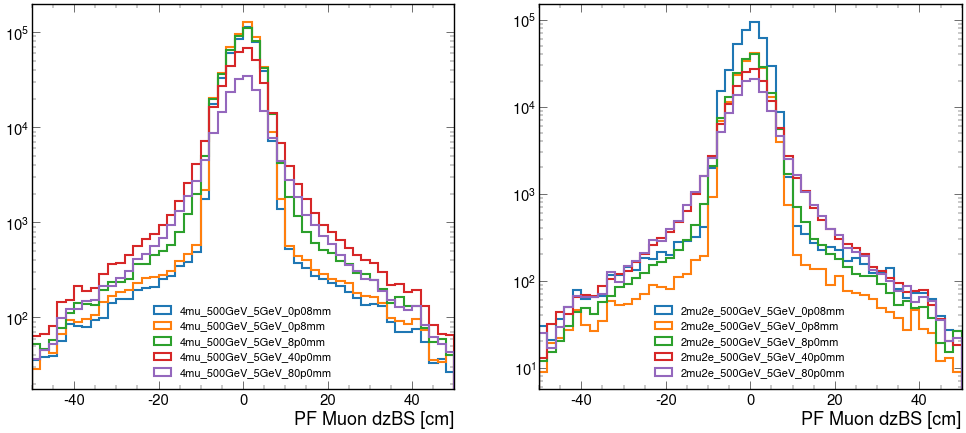

In [44]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-50,50)
ax[1].set_xlim(-50,50)
ax[0].set_xlabel('PF Muon dzBS [cm]')
ax[1].set_xlabel('PF Muon dzBS [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzBS.png", bbox_inches="tight")

## dz - dzBS

4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63], [-0.65, ... 0.783], [-2.66, -2.67, -2.66, -2.66]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.656, -0.656], [-3.18, ... [2.58, 2.58, 2.58], [-3.53, -3.54]]
4mu dz - dzBS structure: [[-2.63, -2.63, -0.612, -2.63], ... -4.55, -4.55, -4.55, -4.55, -4.54, -4.61]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.722, -0.66], [-3.18, ... [-4.07, -4.01], [3.22, 3.22, 3.23]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63, -2.64], [-0.658, ... [4.05, 4.05, 4.05, 4.05, 4.05]]
2mu2e dz - dzBS structure: [[2.92, 2.92], [-0.631, -0.703], [3.39, 3.26, ... -2.33], [1.66, 1.66], [1.99, 1.97]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.65], [0.704, ... [-2.26, -2.25, -2.26, -2.26, -2.26]]
2mu2e dz - dzBS structure: [[-2.2, -2.22], [-0.656, -0.657], [-1.97, ... -2.02], [0.312, 0.311], [0.825, 0.827]]
4mu dz - dzBS structure: [[2.22, 2.22, 2.22], [], [3.03, 3.03, 1.96, ... 2.68], [0.789, 0.789], [4.23, 4.23]]
2mu2e dz - dzBS struct

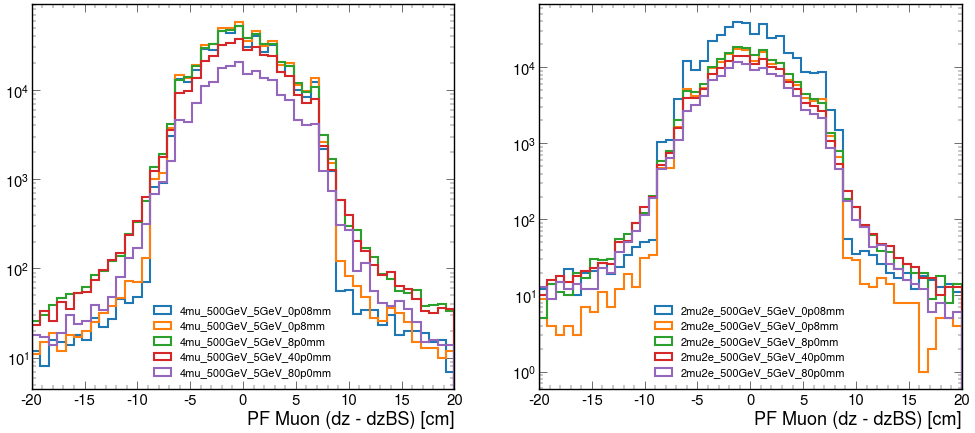

In [45]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz-dzBS.png", bbox_inches="tight")